In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/train.csv')

In [3]:
df

,ID,n0,n1,n2,n3,n4,n5,n6,n7,n8,...,n4087,n4088,n4089,n4090,n4091,n4092,n4093,n4094,n4095,category
0,0,0.000000,0.000000,1.272801,0.290501,0.581446,0.000000,0.000000,0,0.000000,...,1.645888,0.869640,0.302432,0.953719,0.022545,0.498048,0.000000,0.034988,0.692382,Orange_Ripe
1,1,0.000000,0.000000,1.542096,0.000000,0.896557,0.049978,0.000000,0,0.117847,...,1.504220,0.622686,0.588427,0.524415,0.305426,0.386204,0.000000,0.000000,0.668196,Banana_Ripe
2,2,0.000000,0.000000,1.098595,0.571866,0.500355,0.000000,0.000000,0,0.493137,...,1.169341,0.913239,0.064404,0.531270,0.000000,0.471604,0.000000,0.000000,0.658250,Mango_Raw
3,3,0.000000,0.101666,1.159194,0.599216,0.893206,0.000000,0.200139,0,0.645675,...,0.560686,1.243676,0.432523,0.701881,0.000000,0.589985,0.000000,0.000000,0.591165,Leeche_Raw
4,4,0.000000,0.000000,1.178603,0.362568,0.577602,0.000000,0.000000,0,0.079862,...,1.206032,0.736831,0.345906,0.878515,0.119000,0.261441,0.000000,0.000000,0.458905,Mango_Ripe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1211,0.000000,0.364963,0.770978,0.570945,0.996824,0.066661,0.000000,0,0.727390,...,0.317000,0.844568,0.084291,0.399840,0.225693,0.214918,0.000000,0.000000,0.356400,Strawberry_Ripe
1212,1212,0.083656,0.111407,1.753287,0.000000,1.197256,0.117919,0.000000,0,0.000000,...,1.114398,0.659943,0.000000,0.457870,0.405808,0.000000,0.342428,0.000000,0.019390,Banana_Ripe
1213,1213,0.000000,0.000000,1.545725,0.000000,0.842485,0.000000,0.000000,0,0.087607,...,1.490054,0.883849,0.589065,0.644103,0.194427,0.426330,0.000000,0.000000,0.764020,Banana_Ripe
1214,1214,0.000000,0.000000,1.194037,0.969926,0.499340,0.055789,0.000000,0,0.221447,...,0.987144,0.645109,0.113367,0.877268,0.000000,0.175457,0.000000,0.000000,0.367878,Guava_Ripe


In [4]:
img = df.iloc[0, 1:-1]

In [5]:
df.mean(axis=1)

<ipython-input-5-12447cc42592>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=1)


0       0.475165
1       0.456746
2       0.471169
3       0.461023
4       0.512374
          ...   
1211    0.786175
1212    0.776599
1213    0.761384
1214    0.824334
1215    0.813388
Length: 1216, dtype: float64

In [6]:
X, Y = df.iloc[:,1:-1], df.iloc[:,-1]
X.shape, Y.shape

((1216, 4096), (1216,))

In [7]:
Y.unique(), len(Y.unique())

(array(['Orange_Ripe', 'Banana_Ripe', 'Mango_Raw', 'Leeche_Raw',
        'Mango_Ripe', 'Papaya_Ripe', 'Guava_Ripe', 'Apple_Ripe',
        'Pomengranate_Ripe', 'Guava_Raw', 'Strawberry_Raw', 'Apple_Raw',
        'Leeche_Ripe', 'Papaya_Raw', 'Strawberry_Ripe', 'Pomengranate_Raw',
        'Coconut_Ripe', 'Banana_Raw', 'Coconut_Raw', 'Orange_Raw'],
       dtype=object),
 20)

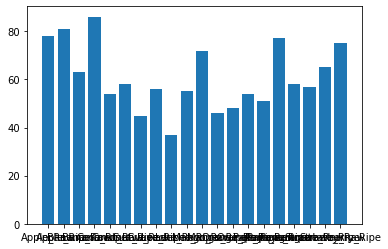

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(*np.unique(Y, return_counts=True))
plt.savefig()

In [9]:
# One-hot encode columns whose dtype is string
for col in X.columns:
    if X[col].dtype == object:
        print("YES")

# So every column is float dtype

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = LinearDiscriminantAnalysis(n_components=2)
X = pca.fit_transform(X, Y)


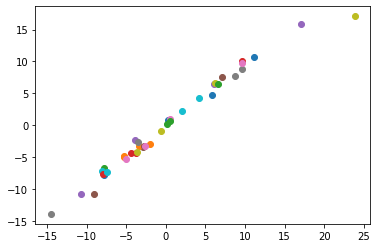

In [12]:
classes = Y.unique()
for cl in classes:
    plt.scatter(X[Y==cl][0], X[Y==cl][1])